<a href="https://colab.research.google.com/github/Dashsouradeep/Linear_Regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#data generation only for here...we will later take custom data
m=100
def generateData(m):

    noise=np.random.randn(m)*3
    X=np.random.randn(m)*10
    Y=3*X+1+noise
    return X,Y
x,y=generateData(m)

#To plot data

<ipython-input-2-e3ad783f4d9d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


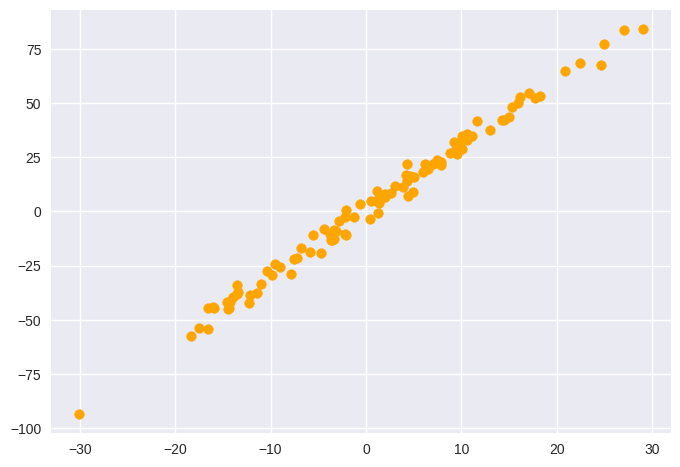

In [ ]:
def plotData(x,y,colour="orange"):
    plt.style.use("seaborn")
    plt.scatter(x,y,c=colour)
    plt.show()
plotData(x,y)

#Normalisation/ Standardisation of data

<ipython-input-2-e3ad783f4d9d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


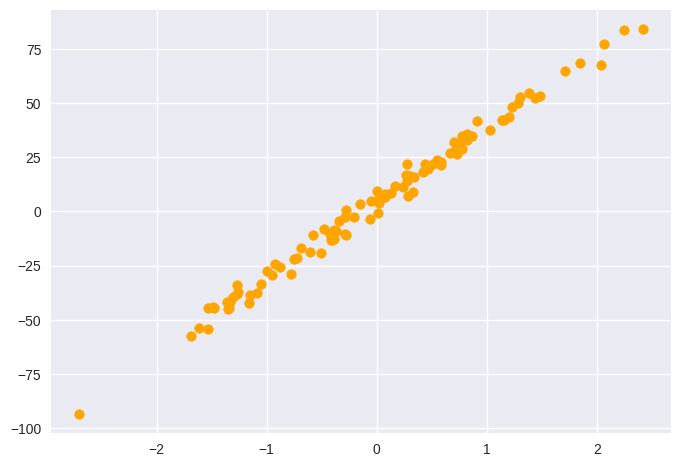

In [ ]:
def standardize(x):
    x=(x-x.mean())/x.std()
    return x

x=standardize(x)
plotData(x,y)

#now i will split datas into arrays so that I could use some of the data for training, & some for testing
#here i want to split in the ration 75:25

In [ ]:
def trainTestSplit(x,y,split=0.75):
    m=x.shape[0]
    data=np.zeros((m,2))
    data[:,0]=x
    data[:,1]=y

    np.random.shuffle(data)

    split=int(m*split)
    #creating training data set
    xT=data[:split,0]
    yT=data[:split,1]

    #creating testing data set
    xt=data[split: ,0]
    yt=data[split: ,1]
    return xT,yT,xt,yt

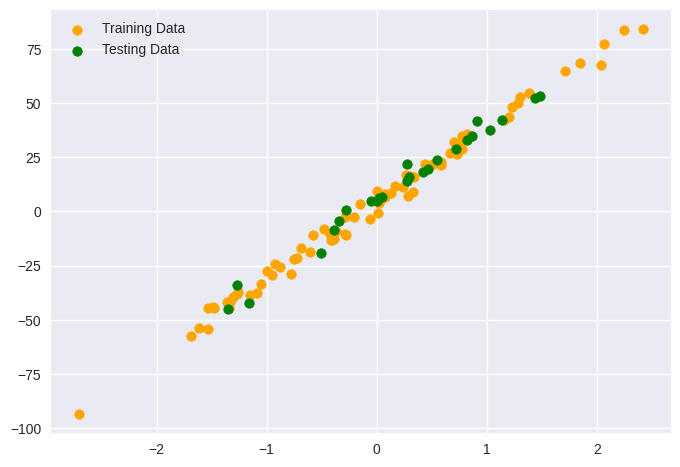

In [ ]:
xT, yT, xt, yt = trainTestSplit(x, y)
plt.scatter(xT, yT, color="orange", label="Training Data")
plt.scatter(xt, yt, color="green", label="Testing Data")
plt.legend()
plt.show()


**Modelling**

In [ ]:
#hypothesis

def hypothesis(x,theta):
  return theta[0]+theta[1]*x

#error function to find mean squared error
def error(x,y,theta):
  m=x.shape[0]
  e=0
  for i in range (m):
    y_=hypothesis(x[i],theta)
    e=e+(y[i]-y_)**2

  e=e/(2*m)
  return e

#i am also making a gradient function to find the gradient
def gradient(x,y,theta):
  m=x.shape[0]
  grad=np.zeros((2,))

  for i in range(m):
    exp=hypothesis(x[i],theta)-y[i]
    grad[0]+= exp
    grad[1]+= exp*x[i]

  return grad/m


#training
def train(x, y, lr=0.1):
    theta = np.zeros((2,))
    maxITRS = 100
    error_list = []

    for i in range(maxITRS):
        grad = gradient(x, y, theta)
        error_list.append(error(x, y, theta))

        # Update theta after calculating the gradient
        theta[0] = theta[0] - lr * grad[0]
        theta[1] = theta[1] - lr * grad[1]

    plt.plot(error_list)
    return theta



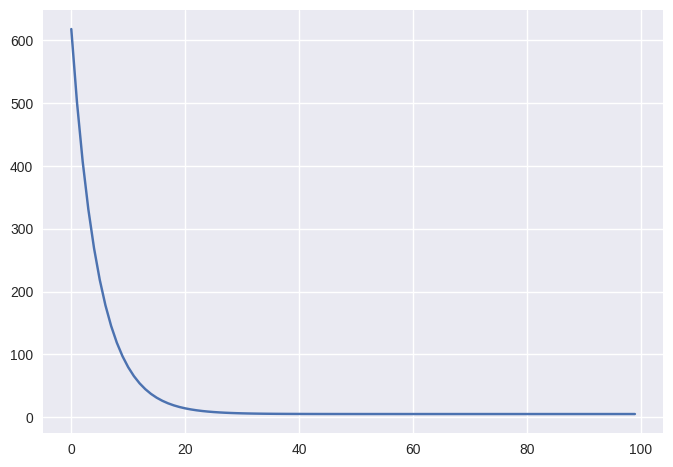

In [ ]:
theta=train(x,y)

In [ ]:
#it us the same as hypothesis function as it will use the same function to give the result
def predict(x,theta):
  return theta[0]+theta[1]*x

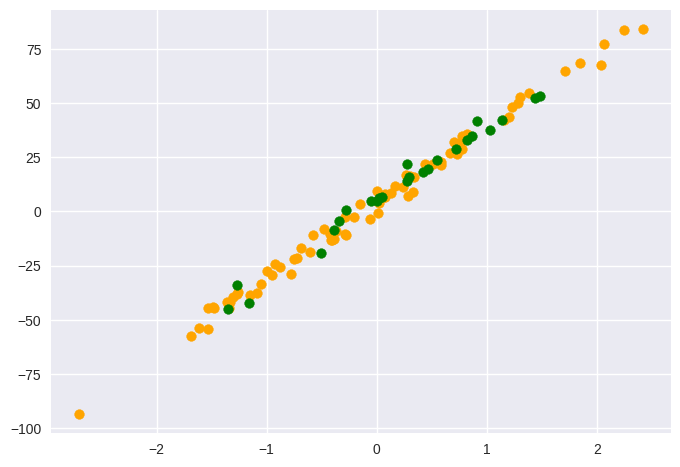

In [ ]:
plt.scatter(xT, yT, color="orange")
plt.scatter(xt, yt, color="green")
plt.legend()
plt.show()

In [ ]:
yp=predict(xt,theta)

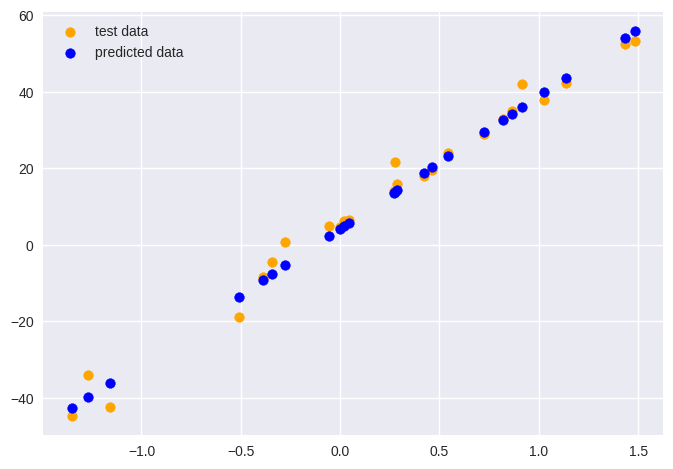

In [ ]:
plt.scatter(xt,yt,color='orange',label="test data")
plt.scatter(xt,yp,color='blue',label="predicted data")
plt.legend()
plt.show()

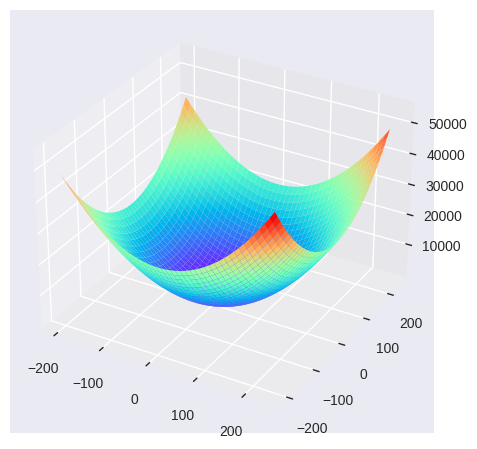

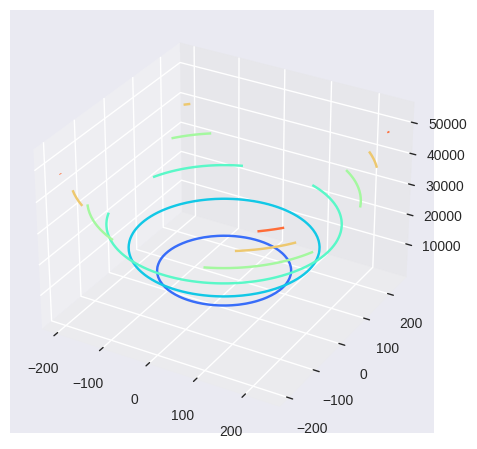

In [ ]:

T0 = np.arange(-200, 250, 10)
T1 = np.arange(-200, 250, 10)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for k in range(J.shape[1]):
        yp = T1[i, k] * x + T0[i, k]
        J[i, k] = np.mean((y - yp) ** 2) / 2

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()
